# Benin Solar Data: Profiling, Cleaning, and EDA

## 1. Import Libraries

Import all necessary Python libraries for data analysis and visualization.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import os

In [25]:
folder_path = "../data/benin_plots"

os.makedirs(folder_path, exist_ok=True)

df = pd.read_csv(
    '/home/abel/Documents/solar-challenge-week1/data/benin-malanville.csv')

In [26]:
df.drop(['Comments', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [27]:
df.nunique()

Timestamp        525600
GHI                8609
DNI                8905
DHI                6995
ModA              10755
ModB               8461
Tamb                329
RH                  980
WS                  164
WSgust               92
WSstdev              42
WD                 3601
WDstdev             679
BP                   19
Cleaning              2
Precipitation        26
TModA               712
TModB               642
dtype: int64

In [28]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [30]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### Summary Statistics & Missing-Value

In [31]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743


In [32]:
df.isna().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [33]:
null_percentage = df.isna().mean() * 100
columns_over_5pct_nulls = null_percentage[null_percentage > 5].index.tolist()
print("Columns with >5% nulls:", columns_over_5pct_nulls)

Columns with >5% nulls: []


### Data Cleaning and Outlier Detection

- Flagging and removing outliers (Z-score > 3)
- Cleaning sensor and wind speed data
- Exporting the cleaned dataset


In [34]:
# Computing z-scores
# key_columns = df.columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_columns].apply(zscore)

# Outlier detection
outliers_per_column = (np.abs(z_scores) > 3).sum()
print(outliers_per_column)

GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [35]:
# Calculate min, max, and mean for each KPI
stats = df[key_columns].agg(['min', 'max', 'mean']).round(2)
print(stats)

          GHI     DNI     DHI     ModA     ModB     WS  WSgust
min    -12.90   -7.80  -12.60     0.00     0.00   0.00    0.00
max   1413.00  952.30  759.20  1342.30  1342.30  19.50   26.60
mean   240.56  167.19  115.36   236.59   228.88   2.12    2.81


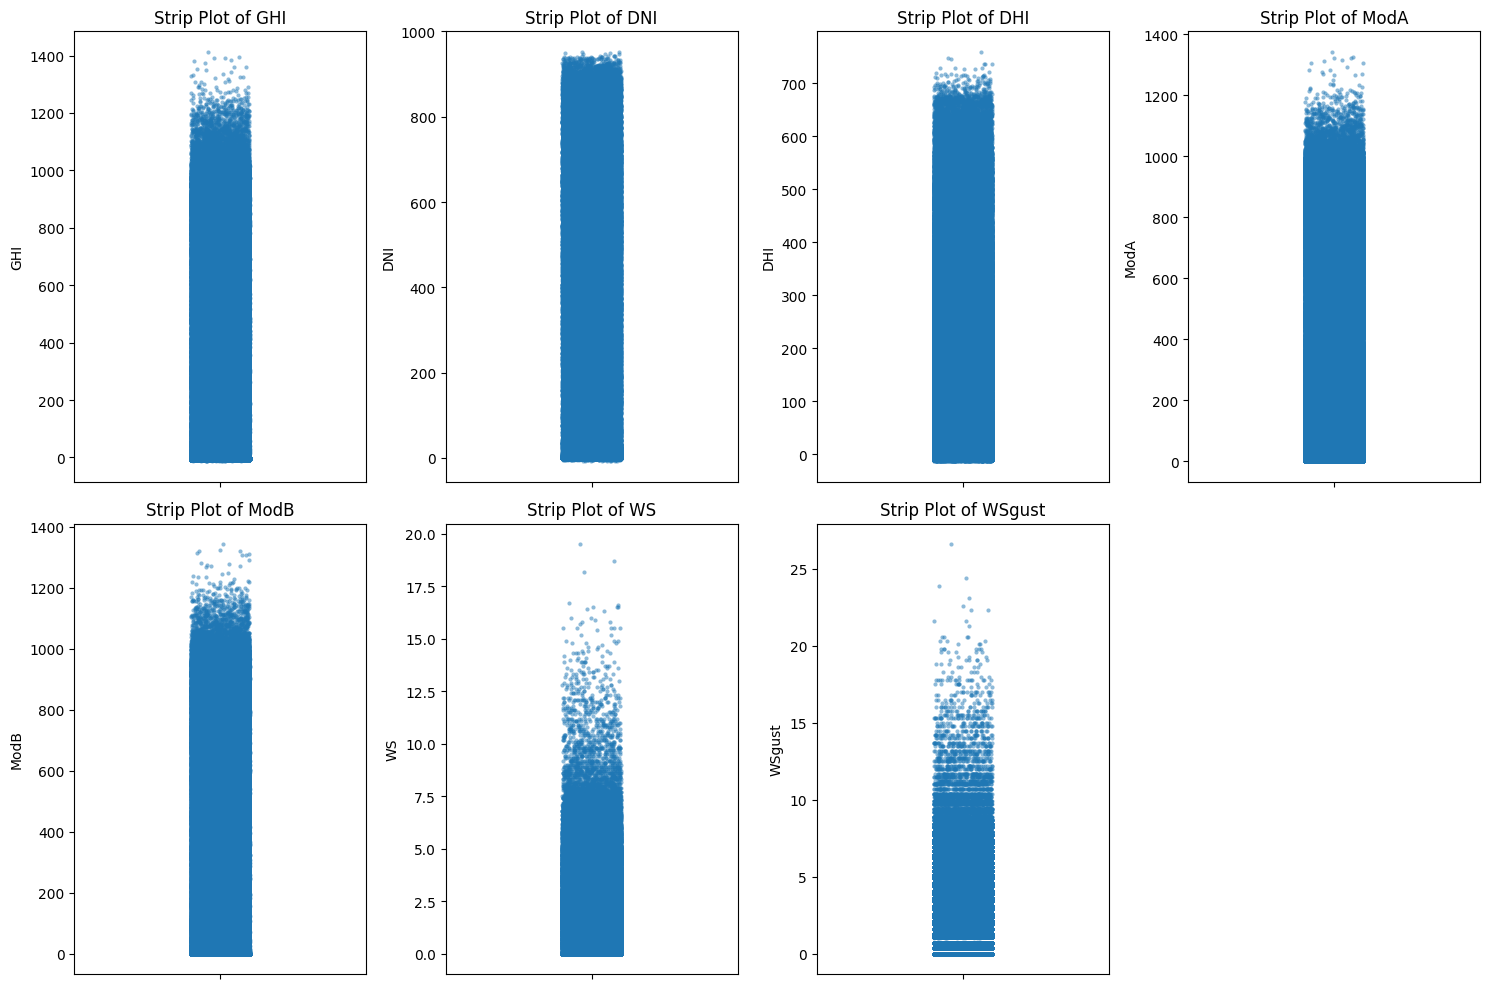

In [36]:
plt.figure(figsize=(15, 10))

# Create a strip plot for each KPI
for i, key_column in enumerate(key_columns, 1):
    plt.subplot(2, 4, i)
    sns.stripplot(data=df, y=key_column, jitter=True, alpha=0.5, size=3)
    plt.title(f'Strip Plot of {key_column}')
    plt.ylabel(key_column)
output_path = os.path.join(folder_path, 'strip_plots.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

In [37]:
columns_to_cap = {
    'GHI': (0, 1200),
    'DNI': (0, 970),
    'DHI': (0, 670),
    'ModA': (0, 1180),
    'ModB': (0, 1180),
    'WS': (0, 30),
    'WSgust': (0, 40),
    'Tamb': (-20, 50),
    'RH': (0, 100)
}

for column, (min_val, max_val) in columns_to_cap.items():
    if column in df.columns:
        # Count values before capping
        below_min = (df[column] < min_val).sum()
        above_max = (df[column] > max_val).sum()

        # Cap the values
        df[column] = df[column].clip(lower=min_val, upper=max_val)

# Export the updated DataFrame
df.to_csv(
    '/home/abel/Documents/solar-challenge-week1/data/benin_clean.csv', index=False)
print("\nCleaned and capped DataFrame exported to 'data/benin_clean.csv'")


Cleaned and capped DataFrame exported to 'data/benin_clean.csv'


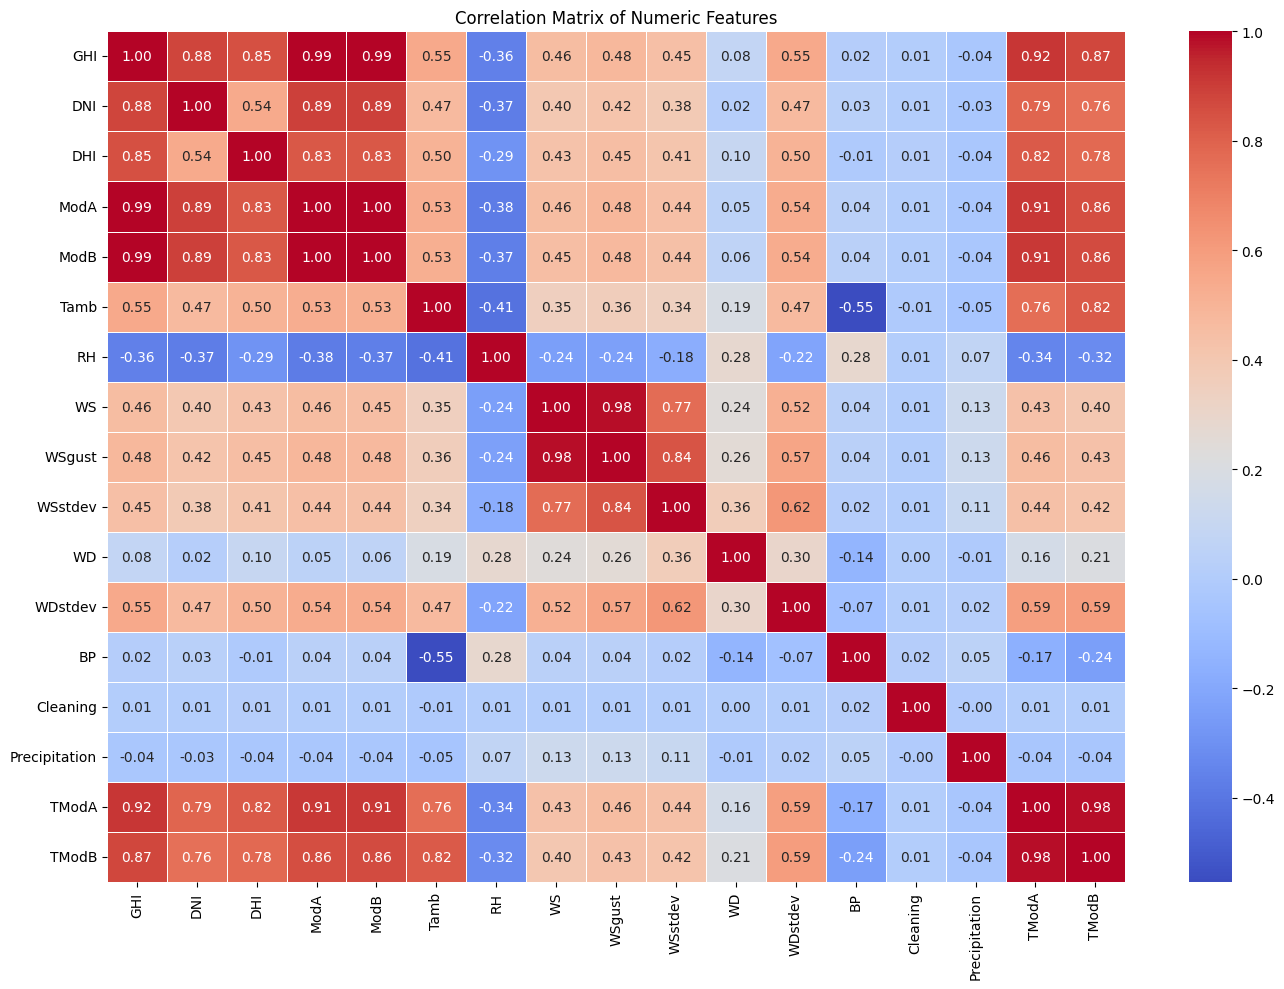

In [38]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
output_path = os.path.join(folder_path, 'correlation_matrix.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

### Time Series Analysis

/tmp/ipykernel_7789/2722306004.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


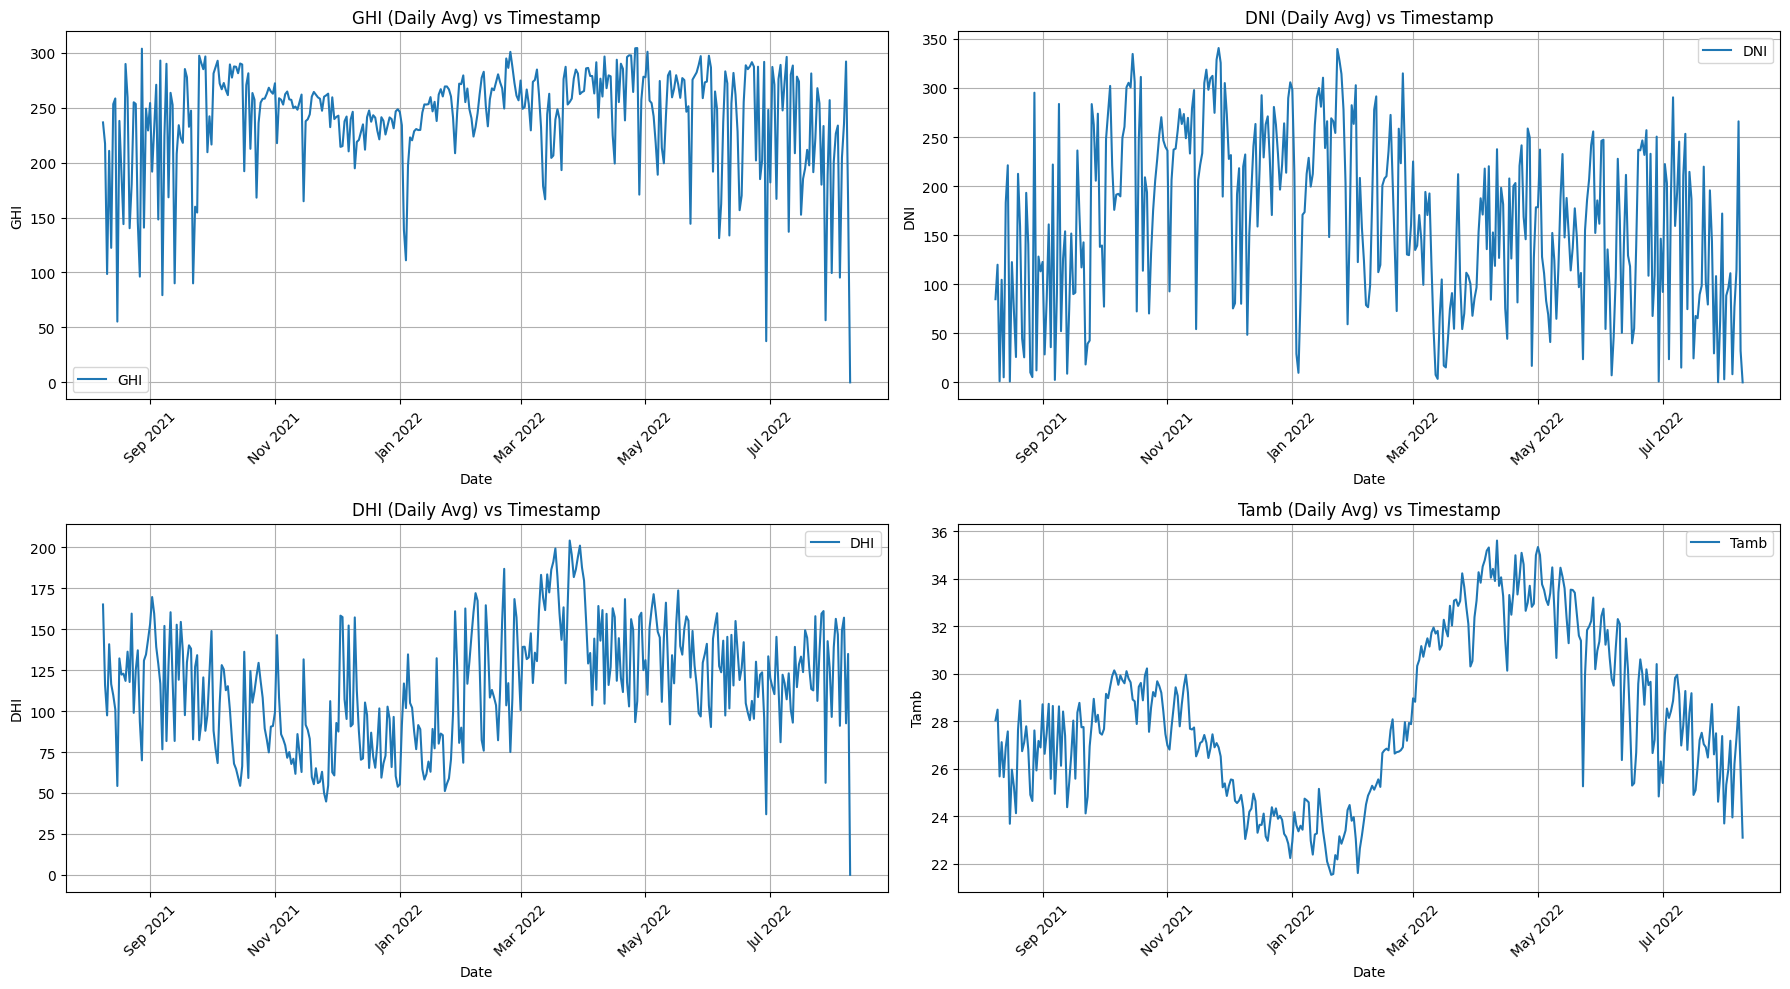

In [39]:
if 'Timestamp' not in df.columns and df.index.name == 'Timestamp':
    df.reset_index(inplace=True)
    df.set_index('Timestamp', inplace=True)
elif 'Timestamp' in df.columns:
    df.set_index('Timestamp', inplace=True)

# Daily mean
df_daily = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

# Monthly mean (for broader seasonal trends)
df_monthly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

plt.figure(figsize=(18, 10))
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_daily.index, df_daily[col], label=col, color='tab:blue')
    plt.title(f'{col} (Daily Avg) vs Timestamp')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
output_path = os.path.join(folder_path, 'daily_avg_plots.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

### Cleaning Impact on ModA & ModB

   Cleaning        ModA        ModB
0         0  236.518435  228.810567
1         1  307.229278  301.972165


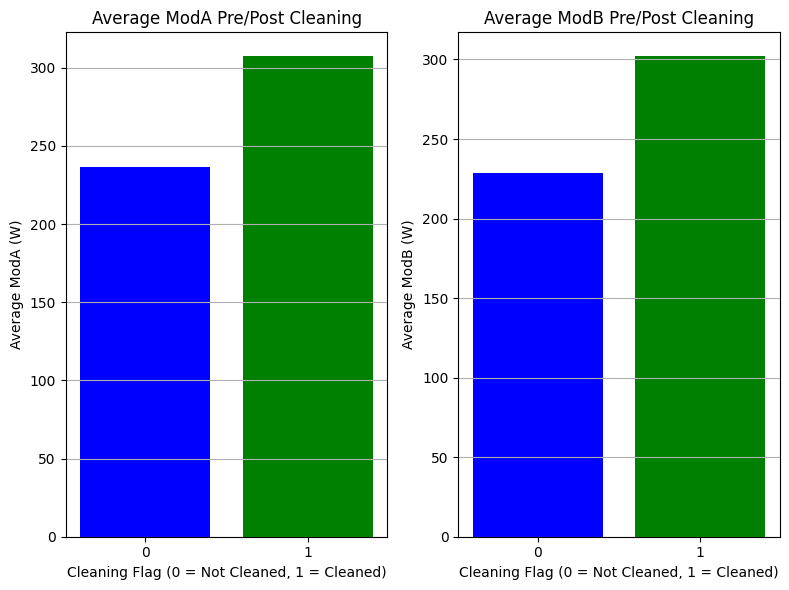

In [40]:
# Group by Cleaning flag and calculate mean of ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
print(cleaning_impact)

# Plot bar chart for ModA and ModB
plt.figure(figsize=(8, 6))

# Bar chart for ModA
plt.subplot(1, 2, 1)
plt.bar(cleaning_impact['Cleaning'].astype(str),
        cleaning_impact['ModA'], color=['blue', 'green'])
plt.title('Average ModA Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0 = Not Cleaned, 1 = Cleaned)')
plt.ylabel('Average ModA (W)')
plt.grid(True, axis='y')

# Bar chart for ModB
plt.subplot(1, 2, 2)
plt.bar(cleaning_impact['Cleaning'].astype(str),
        cleaning_impact['ModB'], color=['blue', 'green'])
plt.title('Average ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0 = Not Cleaned, 1 = Cleaned)')
plt.ylabel('Average ModB (W)')
plt.grid(True, axis='y')
output_path = os.path.join(folder_path, 'cleaning_impact.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

### Correlation & Relationship Analysis
- Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
- Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.


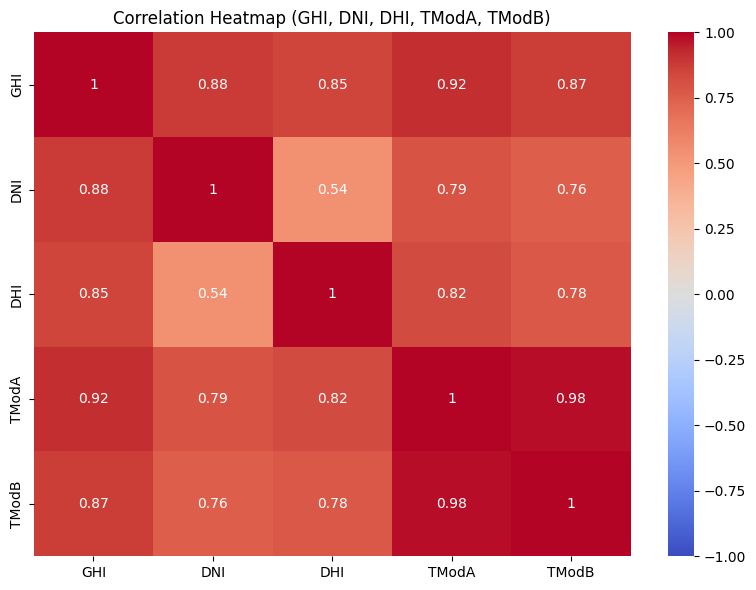

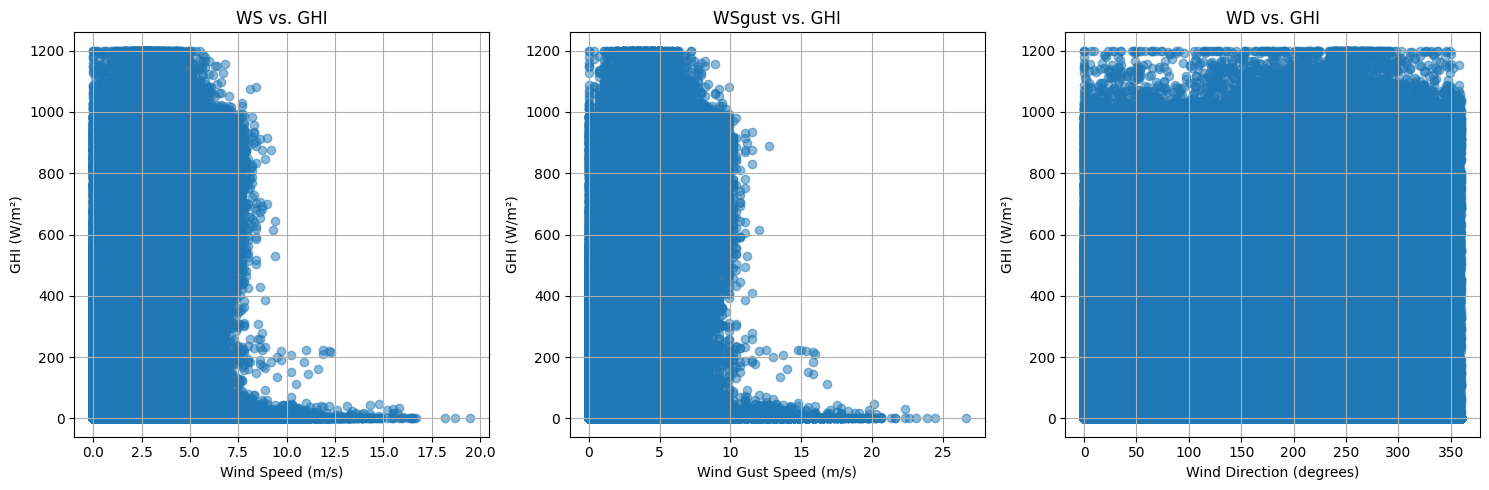

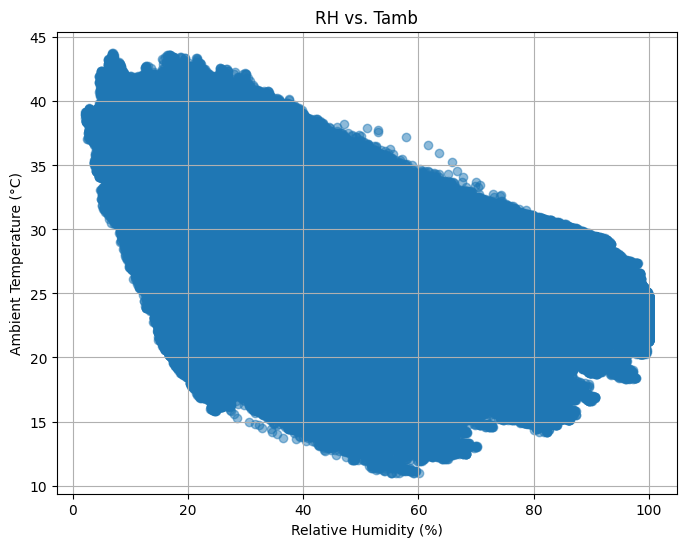

In [41]:
# Heatmap of correlations for GHI, DNI, DHI, TModA, TModB
columns_for_heatmap = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[columns_for_heatmap].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (GHI, DNI, DHI, TModA, TModB)')
output_path = os.path.join(folder_path, 'correlation_heatmap.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))

# WS vs. GHI
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# WSgust vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.title('WSgust vs. GHI')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# WD vs. GHI
plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.title('WD vs. GHI')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
output_path = os.path.join(folder_path, 'scatter_plots.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# Plot for RH vs. Tamb (or RH vs. GHI if Tamb is unavailable)
plt.figure(figsize=(8, 6))

if 'Tamb' in df.columns:
    plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
    plt.title('RH vs. Tamb')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Ambient Temperature (°C)')
else:
    print("Tamb column not found. Plotting RH vs. GHI instead.")
    plt.scatter(df['RH'], df['GHI'], alpha=0.5)
    plt.title('RH vs. GHI')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('GHI (W/m²)')

plt.grid(True)
plt.show()

### Wind & Distribution Analysis
- Wind rose or radial bar plot of WS/WD.
- Histograms for GHI and one other variable (e.g. WS).


/tmp/ipykernel_7789/2156105825.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_data = df.groupby(wd_binned)['WS'].mean().reindex(labels[:-1])


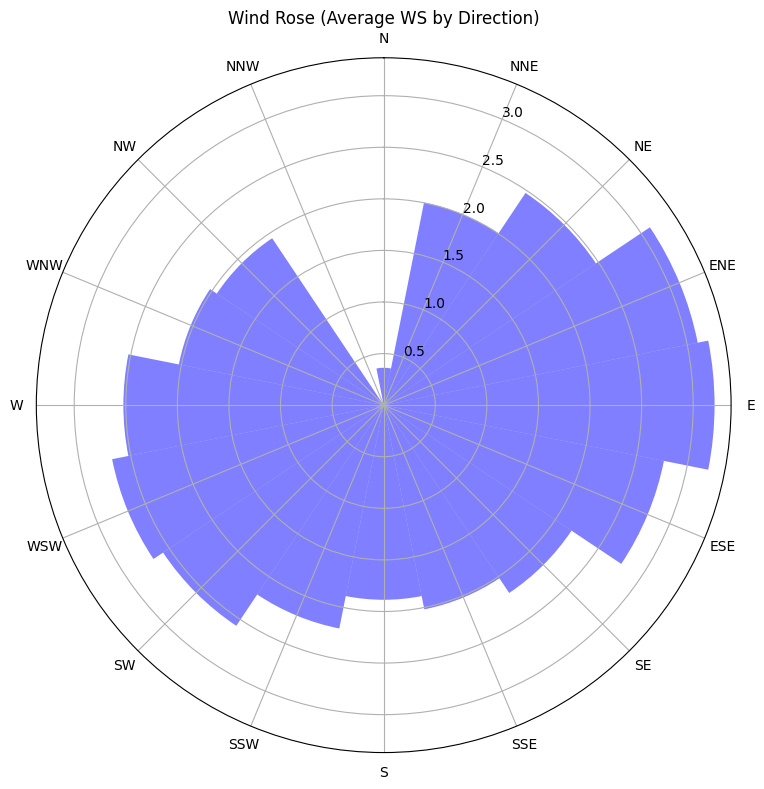

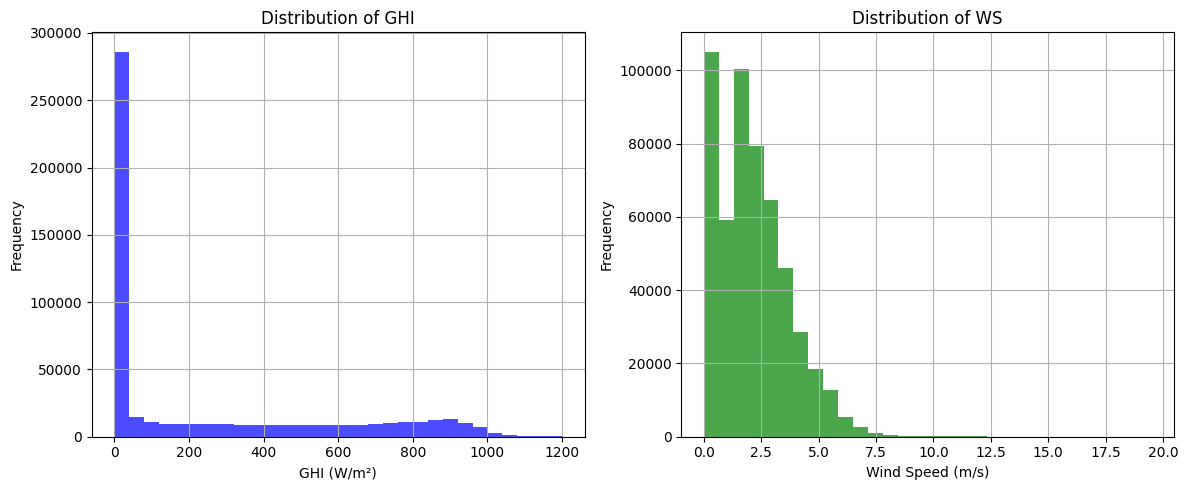

In [42]:
# Wind Rose Plot for WS and WD
# Convert WD to radians for plotting
wd_radians = np.radians(df['WD'])

# Define direction bins (every 22.5 degrees for 16 directions)
bins = np.arange(0, 2 * np.pi, np.pi / 8)  # 0, 22.5, 45, ..., 337.5, 360
labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
          'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Bin the wind directions
wd_binned = pd.cut(wd_radians, bins=bins,
                   labels=labels[:-1], include_lowest=True)

# Group by direction and calculate average WS
wind_data = df.groupby(wd_binned)['WS'].mean().reindex(labels[:-1])

# Create wind rose plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
bars = ax.bar(wind_data.index.map(lambda x: np.radians(np.arange(0, 360, 22.5)[labels.index(x)])),
              wind_data.values,
              width=np.pi/8,
              bottom=0.0,
              color='b',
              alpha=0.5)

# Customize the plot
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.radians(np.arange(0, 360, 22.5)))
ax.set_xticklabels(labels)
plt.title('Wind Rose (Average WS by Direction)')
output_path = os.path.join(folder_path, 'wind_rose_plot.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# Step 2: Histograms for GHI and WS
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of WS')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
output_path = os.path.join(folder_path, 'histograms.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

### Temperature Analysis


Correlations with RH:
RH      1.00
Tamb   -0.41
GHI    -0.36
DNI    -0.37
DHI    -0.29
Name: RH, dtype: float64


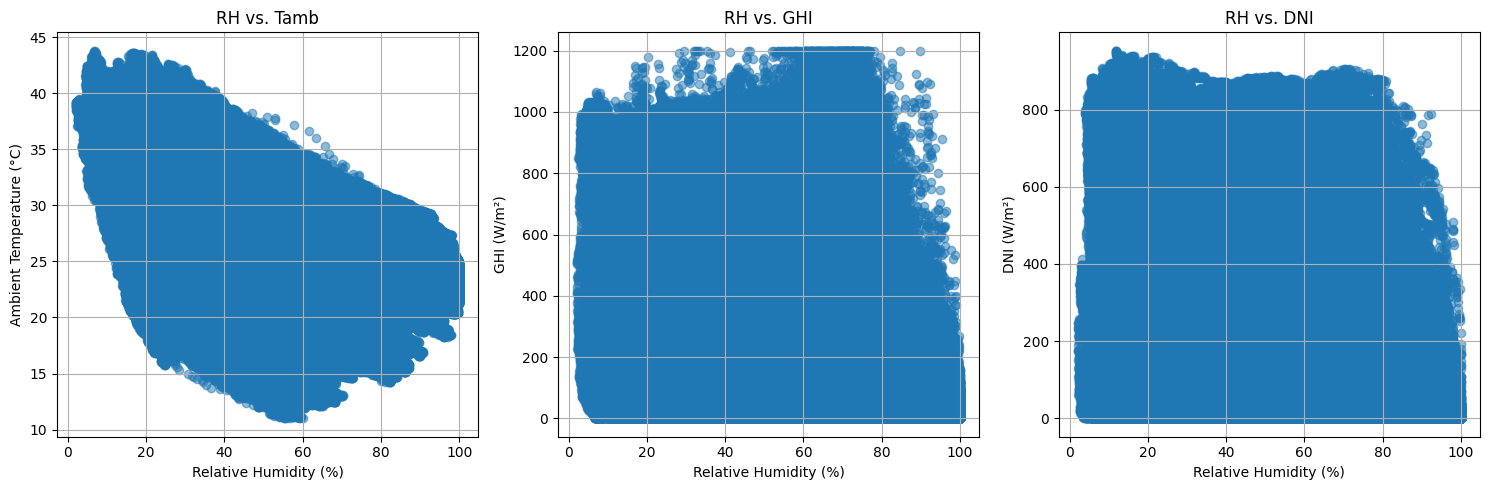

<Figure size 1500x500 with 0 Axes>

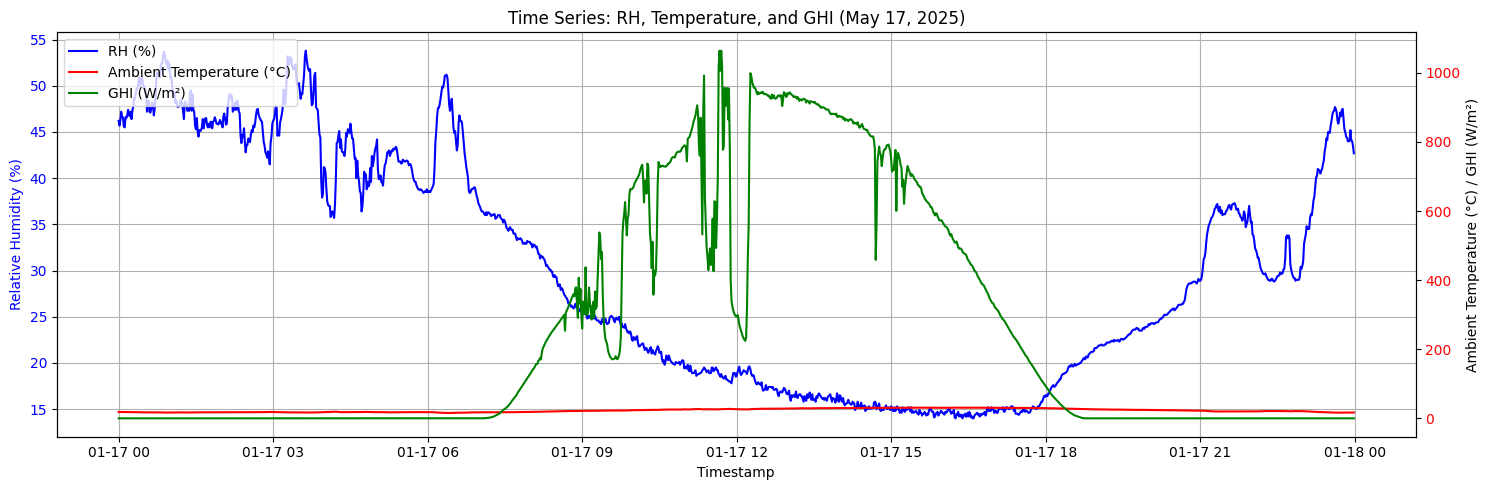

In [43]:
# Check for Tamb; if unavailable, use TModA as a proxy
if 'Tamb' in df.columns:
    temp_column = 'Tamb'
    temp_label = 'Ambient Temperature (°C)'
else:
    temp_column = 'TModA'
    temp_label = 'Module Temperature (TModA, °C)'
    print("Tamb column not found. Using TModA as a proxy for temperature.")

# Step 1: Compute correlations
columns_for_corr = ['RH', temp_column, 'GHI', 'DNI', 'DHI']
correlation_matrix = df[columns_for_corr].corr()

# Display correlations involving RH
print("Correlations with RH:")
print(correlation_matrix['RH'].round(2))

# Step 2: Scatter plots for RH vs. Temperature and RH vs. Solar Radiation
plt.figure(figsize=(15, 5))

# RH vs. Temperature
plt.subplot(1, 3, 1)
plt.scatter(df['RH'], df[temp_column], alpha=0.5)
plt.title(f'RH vs. {temp_column}')
plt.xlabel('Relative Humidity (%)')
plt.ylabel(temp_label)
plt.grid(True)

# RH vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# RH vs. DNI
plt.subplot(1, 3, 3)
plt.scatter(df['RH'], df['DNI'], alpha=0.5)
plt.title('RH vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)
output_path = os.path.join(folder_path, 'scatter_plots_rh.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

# Time series comparison (subset to a smaller period for clarity, e.g., 1 day)
# Choose a single day (e.g., May 17, 2025, the last day in the dataset)
subset = df.loc['2022-01-17'].copy()
plt.figure(figsize=(15, 5))

# Plot RH, Temperature, and GHI on the same plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot RH
ax1.plot(subset.index, subset['RH'], color='blue', label='RH (%)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Relative Humidity (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot Temperature on the second y-axis
ax2 = ax1.twinx()
ax2.plot(subset.index, subset[temp_column], color='red', label=temp_label)
ax2.set_ylabel(temp_label, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot GHI on the second y-axis
ax2.plot(subset.index, subset['GHI'], color='green', label='GHI (W/m²)')
ax2.set_ylabel(temp_label + ' / GHI (W/m²)', color='black')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Time Series: RH, Temperature, and GHI (May 17, 2025)')
plt.xticks(rotation=45)
output_path = os.path.join(folder_path, 'boxplots_by_country.png')
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

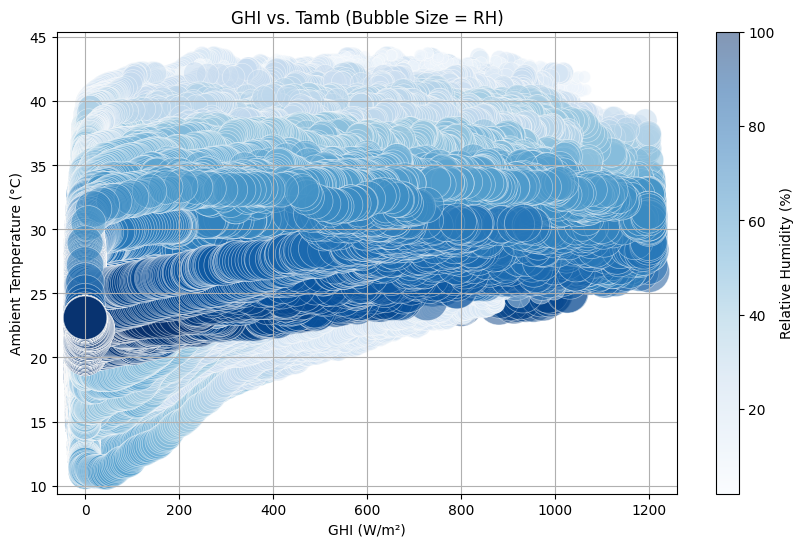

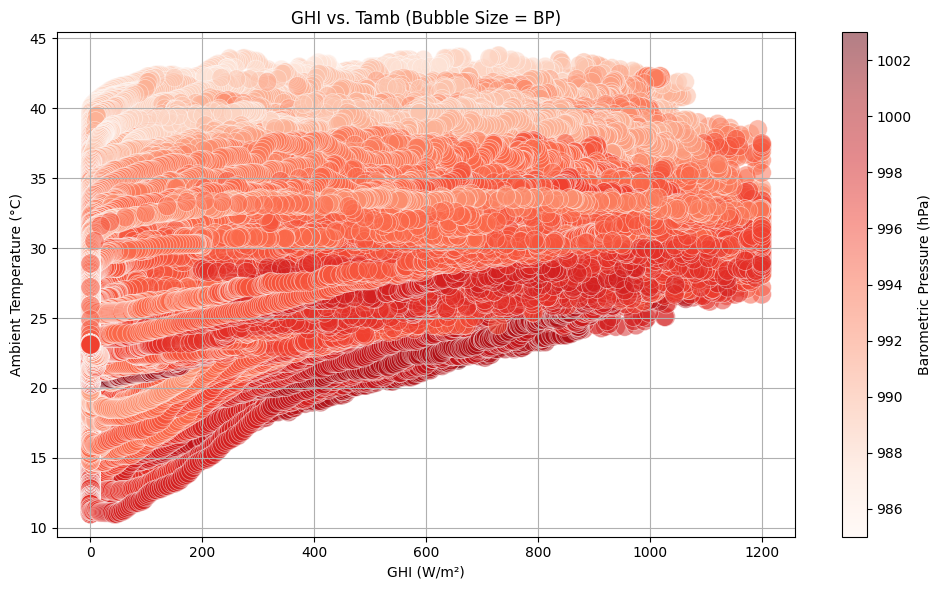

In [44]:
# Check for Tamb; if unavailable, use TModA as a proxy
if 'Tamb' in df.columns:
    temp_column = 'Tamb'
    temp_label = 'Ambient Temperature (°C)'
else:
    temp_column = 'TModA'
    temp_label = 'Module Temperature (TModA, °C)'
    print("Tamb column not found. Using TModA as a proxy for temperature.")

# Step 1: Bubble Chart with Bubble Size = RH
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['GHI'], df[temp_column],
                      s=df['RH']*10,  # Scale bubble size for visibility
                      c=df['RH'],     # Color by RH
                      cmap='Blues',   # Color map for RH
                      alpha=0.5,
                      edgecolors='w',
                      linewidth=0.5)
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.title(f'GHI vs. {temp_column} (Bubble Size = RH)')
plt.xlabel('GHI (W/m²)')
plt.ylabel(temp_label)
plt.grid(True)
plt.show()

# Step 2: Bubble Chart with Bubble Size = BP (if available)
if 'BP' in df.columns:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['GHI'], df[temp_column],
                          s=(df['BP']-900)*2,
                          c=df['BP'],
                          cmap='Reds',
                          alpha=0.5,
                          edgecolors='w',
                          linewidth=0.5)
    plt.colorbar(scatter, label='Barometric Pressure (hPa)')
    plt.title(f'GHI vs. {temp_column} (Bubble Size = BP)')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel(temp_label)
    plt.grid(True)
    output_path = os.path.join(folder_path, 'boxplots_by_country.png')
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.show()
else:
    print("BP column not found. Skipping BP bubble chart.")